RNN numba package
=================



## A few settings



### autoreload



In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

### project root



In [1]:
import os
import sys
# current_dir = os.path.dirname(os.path.abspath('__file__'))
# # Get parent directory (= the project root)
# project_root = os.path.join(current_dir, '..')
# # Append to system path
# sys.path.append(project_root)
# print(sys.path)

print("Python exe")
print(sys.executable)

Python exe
/home/leon/mambaforge/envs/dual_data/bin/python

### imports and setting up matplotlib



In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl

sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '../figs/perf'
golden_ratio = (5**.5 - 1) / 2
width = 6
height = width * golden_ratio

matplotlib.rcParams['figure.figsize'] = [width, height]

matplotlib.rcParams['lines.markersize'] = 5
%matplotlib inline
%config InlineBackend.figure_format = 'png'

a test figure
2

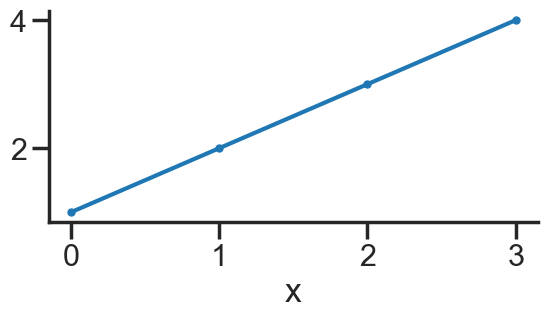

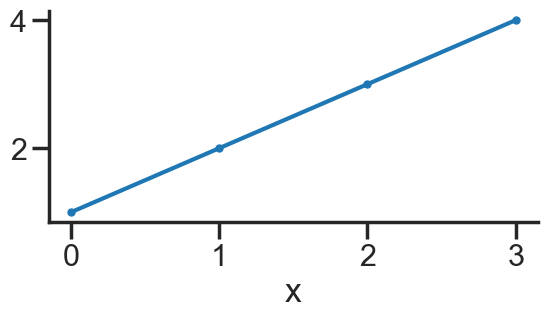

In [1]:
print('a test figure')
plt.figure()
plt.plot([1,2,3,4], '-o')
plt.xlabel('x')
# plt.show()

plt.figure()
plt.plot([1,2,3,4], '-o')
plt.xlabel('x')
# plt.show()

1+1

## Continuous rate model



### imports



In [1]:
import sys
sys.path.insert(0, '/home/leon/tmp/rnn_numba') # put here the path to the repo
from src.model.rate_model import Network

### Single trial



To run a simulation, first we need to define a network model.
The class Network takes two arguments:

1.  the name of the configuration file that defines the model. 
    This file is well detailed (check config<sub>bump.yml</sub> or config<sub>EI.yml</sub>)
2.  the name of the output file that will contain the simulation data.
    The model writes all relevant data to a single dataframe stored in an h5 format



In [1]:
conf_path = "/home/leon/tmp/rnn_numba/conf/"
model = Network('config_bump.yml', 'test', conf_path, VERBOSE=1)

Loading config from /home/leon/tmp/rnn_numba/conf/config_bump.yml
Saving to /home/leon/tmp/rnn_numba/data/simul/test.h5
Jab [[-2.75]]
SIGMA [[0.]]
KAPPA [[0.4]]
Iext [14.]

Then one just runs the model with



In [1]:
model.run()

#+begin_example
  Generating matrix Cij
  random connectivity
  with all to all cosine structure
  Saving matrix to /home/leon/tmp/rnn_numba/data/matrix/Cij.npy
  Parameters:
  N 1000 Na [1000] K 1.0 Ka [1.]
  Iext [14.] Jab [-2.75]
  KAPPA [[0.4]] SIGMA [[0.]]
  MF Rates: [5.09090909]
  Running simulation
  times (s) 0.5 rates (Hz) [2.17]
  times (s) 1.0 rates (Hz) [2.16]
  STIM ON
  times (s) 1.5 rates (Hz) [6.26]
  STIM OFF
  times (s) 2.0 rates (Hz) [5.86]
  times (s) 2.5 rates (Hz) [5.86]
  CUE ON
  times (s) 3.0 rates (Hz) [5.88]
  CUE OFF
  times (s) 3.5 rates (Hz) [5.9]
  times (s) 4.0 rates (Hz) [5.87]
  saving data to /home/leon/tmp/rnn_numba/data/simul/test.h5
  Elapsed (with compilation) = 7.218026272952557s
#+end_example

### analysis



In [1]:
import pandas as pd
from src.analysis.decode import decode_bump

In [1]:
df = pd.read_hdf("/home/leon/tmp/rnn_numba/data/simul/test.h5", mode="r")
print(df.head())

rates        ff       h_E  neurons   time
0  3.899561  3.440118 -5.947128        0  0.499
1  1.512104 -1.030196 -5.946676        1  0.499
2  4.634333  8.938921 -5.946227        2  0.499
3  3.354177  8.559323 -5.945780        3  0.499
4  1.629222 -2.949507 -5.945335        4  0.499

In [1]:
data = df.groupby(['time'])['rates'].apply(decode_bump).reset_index()
data[['m0', 'm1', 'phase']] = pd.DataFrame(data['rates'].tolist(), index=data.index)
data = data.drop(columns=['rates'])

print(data.head())

time        m0        m1     phase
0  0.499  2.169205  0.090843  5.330103
1  0.999  2.160349  0.099340  1.362622
2  1.499  6.259074  7.082152  3.131938
3  1.999  5.858699  5.441624  3.103535
4  2.499  5.864153  5.443271  3.108716

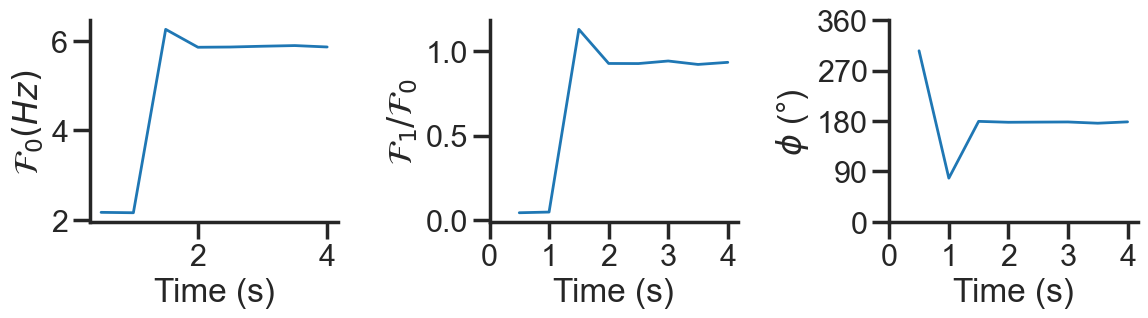

In [1]:
fig, ax = plt.subplots(1, 3, figsize=[2*width, height])

sns.lineplot(data=data, x='time', y='m0', legend=False, lw=2, ax=ax[0])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('$\mathcal{F}_0 (Hz)$')
ax[1].set_xticks([0, 1, 2, 3, 4])

sns.lineplot(x=data['time'], y=data['m1']/data['m0'], legend=False, lw=2, ax=ax[1])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('$\mathcal{F}_1 / \mathcal{F}_0$')
ax[1].set_xticks([0, 1, 2, 3, 4])

sns.lineplot(x=data['time'], y=data['phase']*180/np.pi, legend=False, lw=2, ax=ax[2])
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('$\phi$ (°)')
ax[2].set_xticks([0, 1, 2, 3, 4])
ax[2].set_yticks([0, 90, 180, 270, 360])
plt.show()